### Basic Data Preprocessing

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#* Importing the dataset
dataset = pd.read_csv('data.csv')

#* Outputs the columns Country -> Salary + all it's values
x = dataset.iloc[:, :-1].values

#* Outputs the last column + all its values
y = dataset.iloc[:, 3].values

In [13]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')

In [14]:
imputer = imputer.fit(x[:, 1:3])

#* Replace the missing fields of data with the mean of the column
x[:, 1:3] = imputer.transform(x[:, 1:3])

In [15]:
#* Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

labelEncoder = LabelEncoder()

#* Change Country Values in first column to an array
#* of 'label numbers' & adds them to the X
x[:, 0] = labelEncoder.fit_transform(x[:, 0])

#* Splits the Country column into 3 separate columns
ct = ColumnTransformer([('encoder', OneHotEncoder(), [0])], remainder = 'passthrough')
x = np.array(ct.fit_transform(x), dtype = 'int')


#* Change the Purchase column using LabelEncoder
y = labelEncoder.fit_transform(y)

In [16]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

min_scaler = MinMaxScaler()
# std_scaler = StandardScaler()

x = min_scaler.fit_transform(x)
# x = std_scaler.fit_transform(x)

In [17]:
#* Spliting the dataset into the Training set & Test set
from sklearn.model_selection import train_test_split

#* Make it so that the Test set is 20% and Training set is 80%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(8, 5) (2, 5) (8,) (2,)


### Simple Linear Regression

In [18]:
dataset = pd.read_csv('salary_data.csv')

#* YearsExperience Column
x = dataset.iloc[:, :-1].values

#* Salary Column
y = dataset.iloc[:, 1].values

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(20, 1) (10, 1) (20,) (10,)


<h5>
<p>Linear Regression Formula</p>

$$ Y = mX + b $$

</h5>

In [20]:
from sklearn.linear_model import LinearRegression

#* Create the Simple Linear Regresssion machine/model
regressor = LinearRegression()

#* Fit the training data to the machine/model so that it
#* learns the correlations between Years-of-Experience and Salary
regressor.fit(x_train, y_train)

#* Vector of predictions of the dependent variable
#* Contains the predicted Salaries for all observations of the test set
y_pred = regressor.predict(x_test)

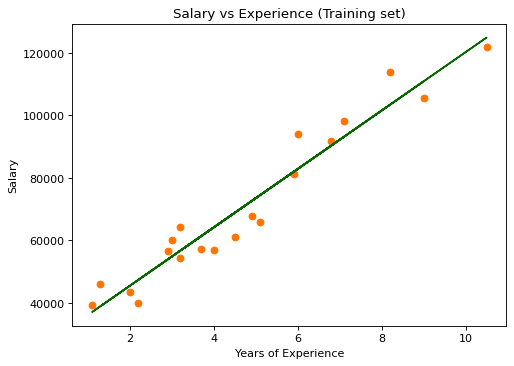

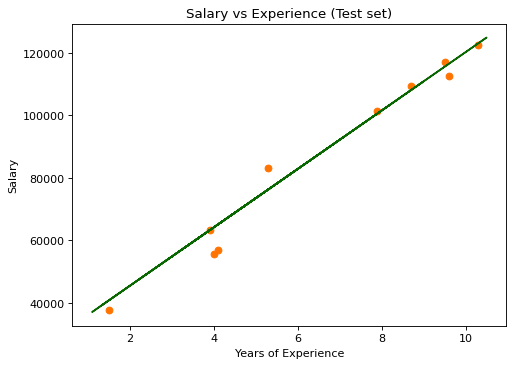

In [21]:

#* Visualising the Training set results

#* Plotting the provided data
plt.figure(figsize = (7, 5), dpi = 80);
plt.scatter(x_train, y_train, color = "#ff7400", marker = 'o')

#* Plotting predictions
plt.plot(x_train, regressor.predict(x_train), color = "#096700")

#* Assign core values to graph
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()


#* Visualising the Test set results
plt.figure(figsize = (7, 5), dpi = 80);
plt.scatter(x_test, y_test, color = "#ff7400", marker = 'o')
plt.plot(x_train, regressor.predict(x_train), color = "#096700")

plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

### Logistic Regression

In [22]:

#* Importing the dataset
dataset = pd.read_csv('social_network_ads.csv')

x = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [24]:
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Logistic Regression Formula

$$
  Y = \frac{1}{1 + e^-(mX + b)}
$$

In [25]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train);

In [26]:
y_pred = classifier.predict(x_test)

In [27]:

#* Making the Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

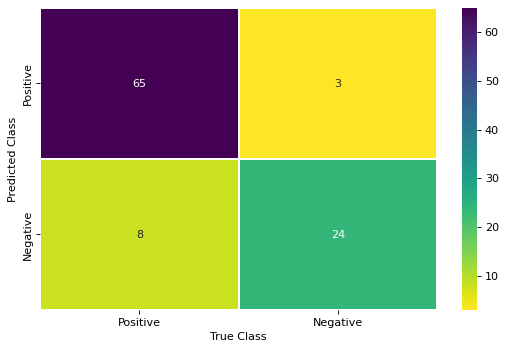

In [28]:
plt.figure(figsize = (8, 5), dpi = 80)
sns.heatmap(cm, annot = True, cmap = 'viridis_r', linewidth = 0.1,
            xticklabels = ['Positive', 'Negative'], yticklabels = ['Positive', 'Negative']);
plt.xlabel('True Class');
plt.ylabel('Predicted Class');

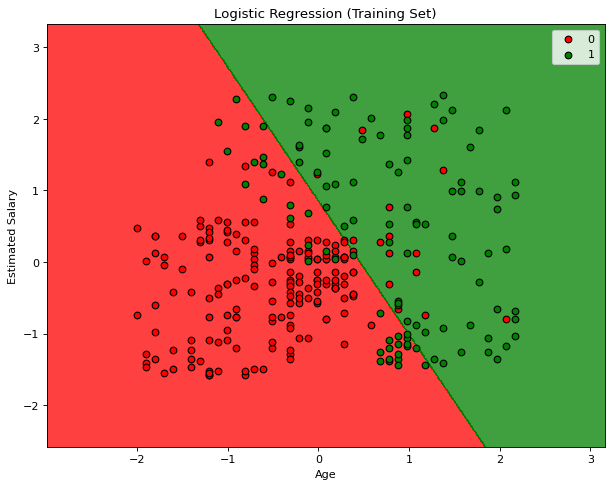

In [29]:

#* Visualising the Training set results
from matplotlib.colors import ListedColormap

x_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))

plt.figure(figsize = (9, 7), dpi = 80)
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                color = ListedColormap(('red', 'green'))(i), label = j, edgecolor='black')
plt.title('Logistic Regression (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

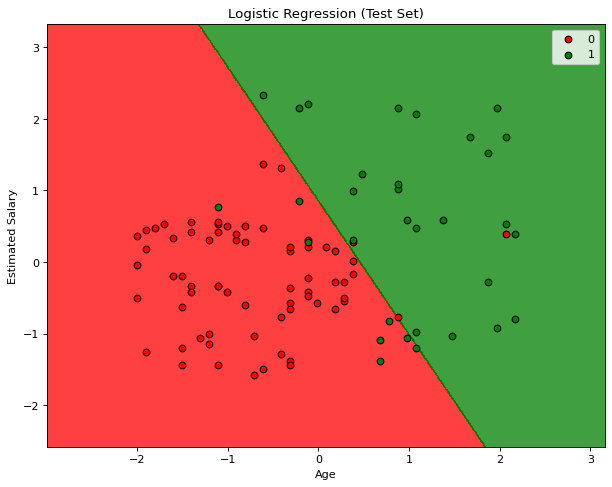

In [30]:
x_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))

plt.figure(figsize = (9, 7), dpi = 80)                    
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                color = ListedColormap(('red', 'green'))(i), label = j, edgecolor='black')
plt.title('Logistic Regression (Test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### K-Nearest Neighbors

In [31]:
#* Importing the dataset
dataset = pd.read_csv('social_network_ads.csv')

x = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [33]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [34]:

#* Fitting Classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)


#* Predicting the Test set results
y_pred = classifier.predict(x_test)

In [35]:
cm = confusion_matrix(y_test, y_pred)

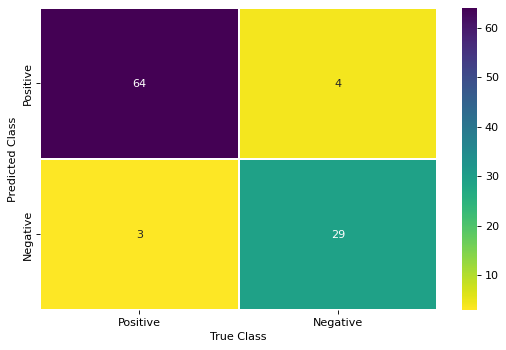

In [36]:
plt.figure(figsize = (8, 5), dpi = 80)
sns.heatmap(cm, annot = True, cmap = 'viridis_r', linewidth = 0.1,
            xticklabels = ['Positive', 'Negative'], yticklabels = ['Positive', 'Negative']);
plt.xlabel('True Class');
plt.ylabel('Predicted Class');

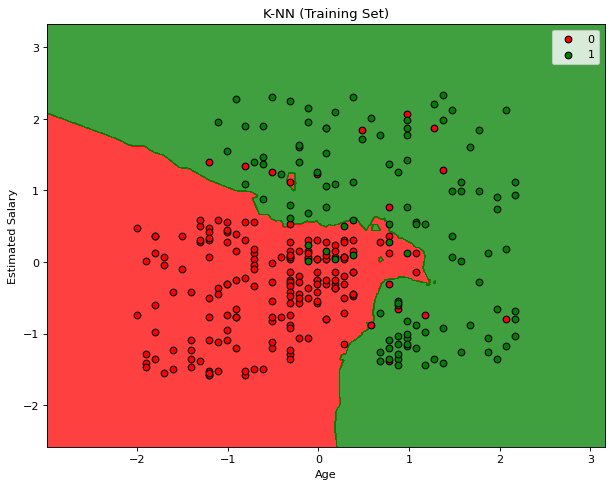

In [37]:

#* Visualising the Training set results
x_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))

plt.figure(figsize = (9, 7), dpi = 80)  
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                color = ListedColormap(('red', 'green'))(i), label = j, edgecolor='black')
plt.title('K-NN (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

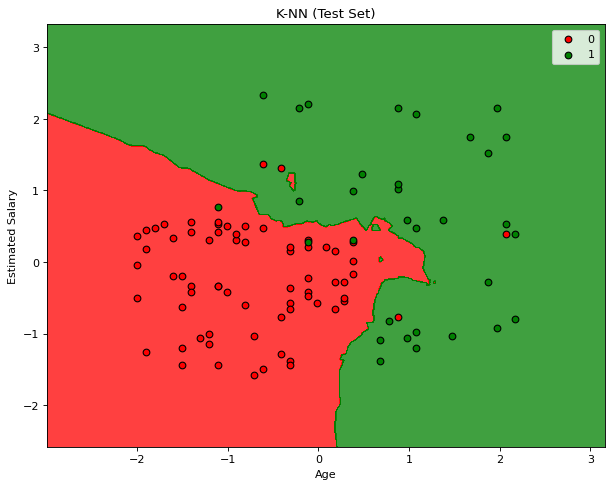

In [38]:

#* Visualising the Test set results
x_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))

plt.figure(figsize = (9, 7), dpi = 80)                      
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                color = ListedColormap(('red', 'green'))(i), label = j, edgecolor='black')
plt.title('K-NN (Test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### K-means Clustering

In [39]:

#* Importing the mall dataset with Pandas
dataset = pd.read_csv('mall_customers.csv')
x = dataset.iloc[:, [3, 4]].values

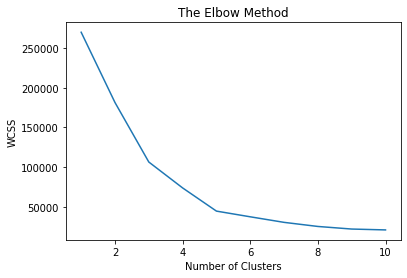

In [40]:

#* Using the Elbow Method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [41]:

#* Based on the graph, we need to use 5 clusters as that is the optimal number for this dataset

#* Applying K-Means to the mall dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

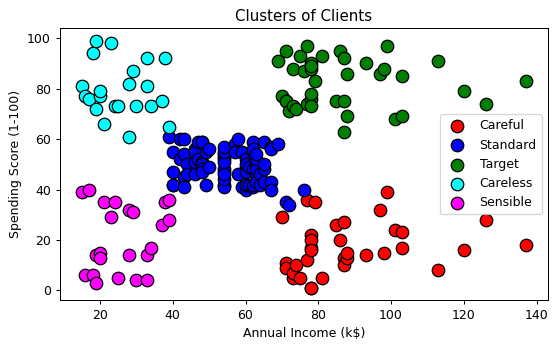

In [42]:

#* Visualising the clusters

plt.figure(figsize = (7, 4), dpi = 90);
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s= 100, c = 'red', edgecolor = 'black', label = 'Careful')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s= 100, c = 'blue', edgecolor = 'black', label = 'Standard')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s= 100, c = 'green', edgecolor = 'black', label = 'Target')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s= 100, c = 'cyan', edgecolor = 'black', label = 'Careless')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s= 100, c = 'magenta', edgecolor = 'black', label = 'Sensible')

# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s= 300, c = 'yellow', edgecolor = 'black', label = 'Centroids')

plt.title('Clusters of Clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()